In [1]:
# Importing libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics

## Data Exploration

In [2]:
# Reading the data

df = pd.read_csv('trainData.csv')

In [3]:
# Checking the first five rows of the data

df.head()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Class
0,1,-0.009718,0.95916,-0.573790,0.2483,4761.600,0.00000,-0.063350,0.042582,0.71529,...,0.217300,-0.23794,0.92978,0.229500,5.6029,15.2020,389.510,0.93708,0.88256,0
1,2,-0.028198,0.88926,-0.094677,0.8446,-51.985,0.00000,-0.026809,0.124530,2.25350,...,-0.012942,-0.25463,1.01100,2.495400,11.5510,7.7838,98.677,3.69890,4.64230,0
2,3,0.040084,0.72921,0.038927,1.0950,-13.879,0.12377,0.054624,0.365120,1.06300,...,0.059224,0.15055,0.94078,1.199900,18.6880,5.4889,81.308,4.48910,3.33600,0
3,4,0.066797,0.64454,0.128720,1.1997,-40.430,0.13798,0.083592,0.545800,1.05270,...,0.050029,0.18988,0.94997,0.000000,6.2959,6.3177,100.740,3.62310,10.30000,0
4,5,0.336170,0.29870,0.487480,2.8759,295.460,0.00000,0.418350,2.347900,0.93787,...,0.456880,0.47935,0.55934,0.053517,13.0380,1.4116,101.130,3.60910,3.71200,0


In [4]:
# Dropping the ID column

df.drop('ID', axis=1, inplace=True)

In [5]:
# Checking general information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27223 entries, 0 to 27222
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   27223 non-null  float64
 1   Attr2   27223 non-null  float64
 2   Attr3   27223 non-null  float64
 3   Attr4   27223 non-null  float64
 4   Attr5   27223 non-null  float64
 5   Attr6   27223 non-null  float64
 6   Attr7   27223 non-null  float64
 7   Attr8   27223 non-null  float64
 8   Attr9   27223 non-null  float64
 9   Attr10  27223 non-null  float64
 10  Attr11  27223 non-null  float64
 11  Attr12  27223 non-null  float64
 12  Attr13  27223 non-null  float64
 13  Attr14  27223 non-null  float64
 14  Attr15  27223 non-null  float64
 15  Attr16  27223 non-null  float64
 16  Attr17  27223 non-null  float64
 17  Attr18  27223 non-null  float64
 18  Attr19  27223 non-null  float64
 19  Attr20  27223 non-null  float64
 20  Attr22  27223 non-null  float64
 21  Attr23  27223 non-null  float64
 22

The data consists of 27223 rows and 62 features and a target column. <br>
Data types are assigned correctly, and there seems to be no missing values.

##### Understanding Features:
* **Attr1:** net profit / total assets <br>
*Net Profit Margin: Indicates the profitability of a company relative to its total assets.*
* **Attr2:** total liabilities / total assets <br>
*Debt-to-Asset Ratio: Measures the proportion of a company's assets financed by debt.*
* **Attr3:** working capital / total assets <br>
*Working Capital Ratio: Shows the portion of assets tied up in working capital relative to total assets.*
* **Attr4:** current assets / short-term liabilities <br>
*Current Ratio: Reflects a company's ability to meet short-term liabilities using its current assets.*
* **Attr5:** ((cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)) * 365 <br>
*Cash Conversion Cycle: Measures the efficiency of a company's cash flow management in days.*
* **Attr6:** retained earnings / total assets <br>
*Retained Earnings to Total Assets: Indicates the proportion of earnings retained in the company.*
* **Attr7:** EBIT / total assets <br>
*EBIT Margin: Represents earnings before interest and taxes relative to total assets.*
* **Attr8:** book value of equity / total liabilities <br>
*Equity-to-Debt Ratio: Shows the relationship between equity and debt in a company's capital structure.*
* **Attr9:** sales / total assets <br>
*Asset Turnover: Indicates how efficiently assets are used to generate sales.*
* **Attr10:** equity / total assets <br>
*Equity Ratio: Measures the proportion of equity relative to total assets.*
* **Attr11:** (gross profit + extraordinary items + financial expenses) / total assets <br>
*Return on Assets: Reflects the profitability of a company's assets.*
* **Attr12:** gross profit / short-term liabilities <br>
*Gross Profit to Short-term Liabilities: Indicates the ability to cover short-term liabilities with gross profit.*
* **Attr13:** (gross profit + depreciation) / sales <br>
*Gross Profit Margin: Represents gross profit as a percentage of sales.*
* **Attr14:** (gross profit + interest) / total assets <br>
*Profitability to Total Assets: Measures profitability relative to total assets.*
* **Attr15:** (total liabilities * 365) / (gross profit + depreciation) <br>
*Financial Leverage: Reflects the impact of leverage on the company's profitability.*
* **Attr16:** (gross profit + depreciation) / total liabilities <br>
*Gross Profit to Total Liabilities: Shows the ability to cover liabilities with gross profit.*
* **Attr17:** total assets / total liabilities <br>
*Asset-to-Liability Ratio: Indicates the relationship between total assets and total liabilities.*
* **Attr18:** gross profit / total assets <br>
*Gross Profit to Total Assets: Reflects the efficiency of assets in generating gross profit.*
* **Attr19:** gross profit / sales <br>
*Gross Profit to Sales: Measures gross profit as a percentage of sales.*
* **Attr20:** (inventory * 365) / sales <br>
*Inventory Turnover: Shows how many times inventory is sold and replaced in a year.*
* **Attr22:** profit on operating activities / total assets <br>
*Return on Investment: Indicates profitability in relation to total assets.*
* **Attr23:** net profit / sales <br>
*Net Profit Margin: Reflects net profit as a percentage of sales.*
* **Attr24:** gross profit (in 3 years) / total assets <br>
*Long-term Profitability: Reflects gross profit over three years relative to total assets.*
* **Attr25:** (equity - share capital) / total assets <br>
*Equity Adjusted for Share Capital: Measures equity adjusted for share capital relative to total assets.*
* **Attr26:** (net profit + depreciation) / total liabilities <br>
*Earnings and Depreciation to Liabilities: Shows the ability to cover liabilities with earnings and depreciation.*
* **Attr27:** profit on operating activities / financial expenses <br>
*Operating Profit to Financial Expenses: Measures the ability to cover financial expenses with operating profit.*
* **Attr28:** working capital / fixed assets <br>
*Working Capital to Fixed Assets: Indicates the portion of fixed assets financed by working capital.*
* **Attr29:** logarithm of total assets <br>
*Logarithm of Total Assets: Represents the size of the company.*
* **Attr30:** (total liabilities - cash) / sales <br>
*Liquidity Adjusted for Cash: Measures liquidity adjusted for cash relative to sales.*
* **Attr31:** (gross profit + interest) / sales <br>
*Profit Margin on Sales: Reflects profit margin as a percentage of sales.*
* **Attr32:** (current liabilities * 365) / cost of products sold <br>
*Inventory Turnover to Cost of Goods Sold: Measures inventory turnover relative to cost of products sold.*
* **Attr33:** operating expenses / short-term liabilities <br>
*Efficiency of Operating Expenses: Indicates the efficiency of operating expenses relative to short-term liabilities.*
* **Attr34:** operating expenses / total liabilities <br>
*Operating Expenses to Total Liabilities: Measures the efficiency of operating expenses relative to total liabilities.*
* **Attr35:** profit on sales / total assets <br>
*Profitability to Total Assets: Measures profitability relative to total assets.*
* **Attr36:** total sales / total assets <br>
*Asset Turnover: Reflects how efficiently assets are used to generate sales.*
* **Attr38:** constant capital / total assets <br>
*Capital Structure Efficiency: Indicates the efficiency of capital structure in relation to total assets.*
* **Attr39:** profit on sales / sales <br>
*Profit Margin on Sales: Represents profit margin as a percentage of sales.*
* **Attr40:** (current assets - inventory - receivables) / short-term liabilities <br>
*Liquidity Adjusted for Working Capital: Measures liquidity adjusted for working capital relative to short-term liabilities.*
* **Attr41:** total liabilities / ((profit on operating activities + depreciation) * (12/365)) <br>
*Debt Coverage: Indicates the ability to cover debt with operating profit and depreciation.*
* **Attr42:** profit on operating activities / sales <br>
*Profit Margin on Sales: Reflects profit margin as a percentage of sales.*
* **Attr43:** rotation receivables + inventory turnover in days <br>
*Receivables and Inventory Turnover: Measures the efficiency of receivables and inventory turnover in days.*
* **Attr44:** (receivables * 365) / sales <br>
*Receivables Turnover: Indicates how many times receivables are collected in a year.*
* **Attr45:** net profit / inventory <br>
*Profitability of Inventory: Reflects net profit as a percentage of inventory.*
* **Attr46:** (current assets - inventory) / short-term liabilities <br>
*Liquidity Adjusted for Inventory: Measures liquidity adjusted for inventory relative to short-term liabilities.*
* **Attr47:** (inventory * 365) / cost of products sold <br>
*Inventory Turnover: Shows how many times inventory is sold in a year.*
* **Attr48:** EBITDA (profit on operating activities - depreciation) / total assets <br>
*EBITDA Margin: Represents EBITDA as a percentage of total assets.*
* **Attr49:** EBITDA (profit on operating activities - depreciation) / sales <br>
*EBITDA Margin: Reflects EBITDA as a percentage of sales.*
* **Attr50:** current assets / total liabilities <br>
*Current Asset Coverage: Measures the ability to cover liabilities with current assets.*
* **Attr51:** short-term liabilities / total assets <br>
*Liquidity Adjusted for Total Assets: Indicates the portion of total assets financed by short-term liabilities.*
* **Attr52:** (short-term liabilities * 365) / cost of products sold) <br>
*Efficiency of Short-term Liabilities: Measures short-term liabilities relative to cost of products sold.*
* **Attr53:** equity / fixed assets <br>
*Equity Efficiency: Indicates the efficiency of equity in relation to fixed assets.*
* **Attr54:** constant capital / fixed assets <br>
*Capital Structure Efficiency: Reflects the efficiency of capital structure in relation to fixed assets.*
* **Attr55:** working capital <br>
*Working Capital: Represents the amount of capital available for day-to-day operations.*
* **Attr56:** (sales - cost of products sold) / sales <br>
*Operating Efficiency: Reflects operating efficiency as a percentage of sales.*
* **Attr57:** (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) <br>
*Liquidity Adjusted for Operating Activities: Measures liquidity adjusted for operating activities relative to sales.*
* **Attr58:** total costs /total sales <br>
*Cost Efficiency: Indicates the efficiency of cost management relative to total sales.*
* **Attr59:** long-term liabilities / equity <br>
*Long-term Debt-to-Equity Ratio: Reflects the proportion of long-term debt to equity.*
* **Attr60:** sales / inventory <br>
*Inventory Turnover: Measures how many times inventory is sold relative to sales.*
* **Attr61:** sales / receivables <br>
*Receivables Turnover: Indicates how many times receivables are collected relative to sales.*
* **Attr62:** (short-term liabilities *365) / sales <br>
*Efficiency of Short-term Liabilities: Measures short-term liabilities relative to sales.*
* **Attr63:** sales / short-term liabilities <br>
*Sales-to-Short-term Liabilities: Indicates the relationship between sales and short-term liabilities.*
* **Attr64:** sales / fixed assets <br>
*Asset Efficiency: Reflects the efficiency of assets in generating sales.*

In [6]:
# Checking some basic statistics about the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attr1,27223.0,0.066933,0.567807,-6.815000e+00,0.004930,0.051329,0.127380,8.745900e+01
Attr2,27223.0,0.499939,2.643989,-4.308700e+02,0.280790,0.476000,0.683030,1.306300e+01
Attr3,27223.0,0.180411,0.378568,-1.213500e+01,0.023201,0.189390,0.380480,9.939600e-01
Attr4,27223.0,2.723166,6.986696,3.576800e-03,1.053500,1.542100,2.638050,5.088600e+02
Attr5,27223.0,-479.374696,74120.852075,-1.190300e+07,-48.812000,-2.992200,44.538500,1.034100e+06
Attr6,27223.0,0.070980,4.597333,-1.174200e+02,0.000000,0.000000,0.115610,5.432500e+02
Attr7,27223.0,0.082611,5.036480,-5.174800e+02,0.007645,0.061365,0.148530,6.492300e+02
Attr8,27223.0,4.784812,254.096929,-1.848200e+00,0.441760,1.054900,2.478000,2.963600e+04
Attr9,27223.0,2.034210,59.052062,4.691500e-04,1.022400,1.178000,1.989350,9.742300e+03
Attr10,27223.0,0.477750,2.095586,-1.247300e+01,0.300505,0.500510,0.695000,3.398500e+02


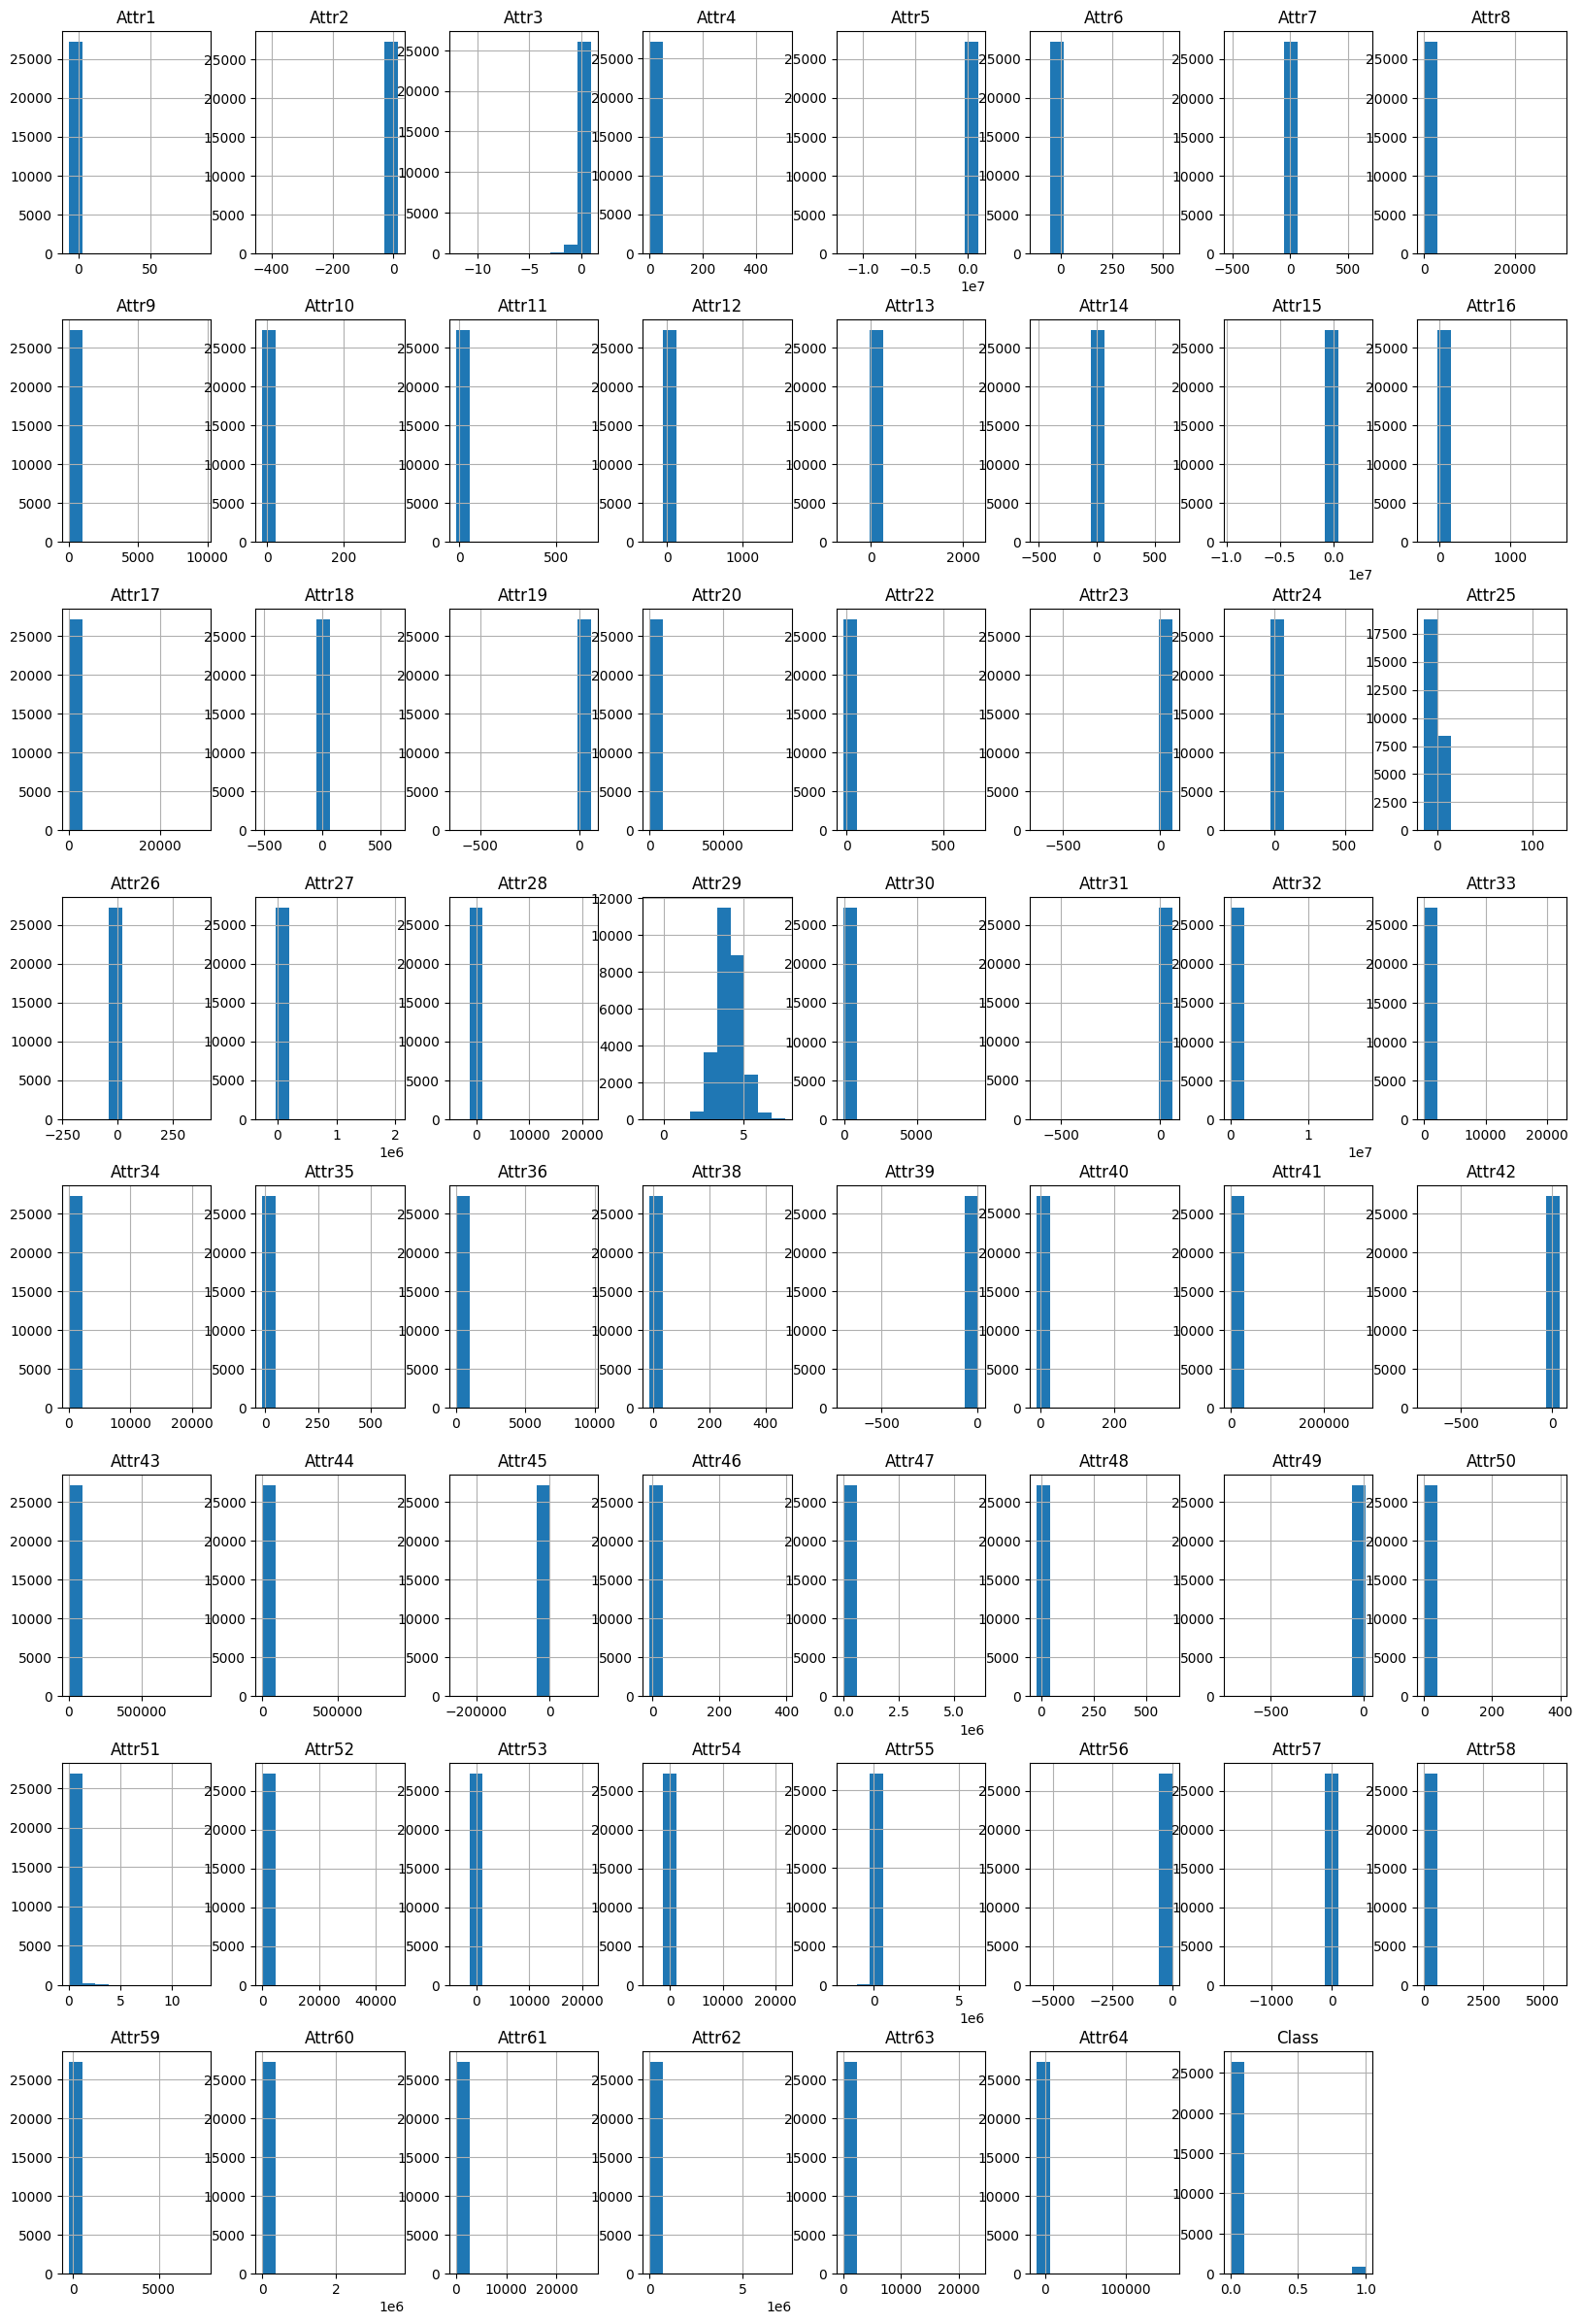

In [7]:
# Checking the distribution of the data

df.hist(figsize=(20, 30))
plt.show()

The distribution of different columns vary, but generally we can say that the variables are highly skewed with a strong presence of outliers.

In [8]:
# Checking for null values

for col in df.columns:
    nulls = df[col].isna().sum()
    if nulls > 0:
        print(f'{col}: {nulls}')
        print('-' * 20)

There are no null values.

In [9]:
# Checking for duplicates

duplicates = df[df.duplicated()]

len(duplicates)

196

There are 196 duplicated rows.

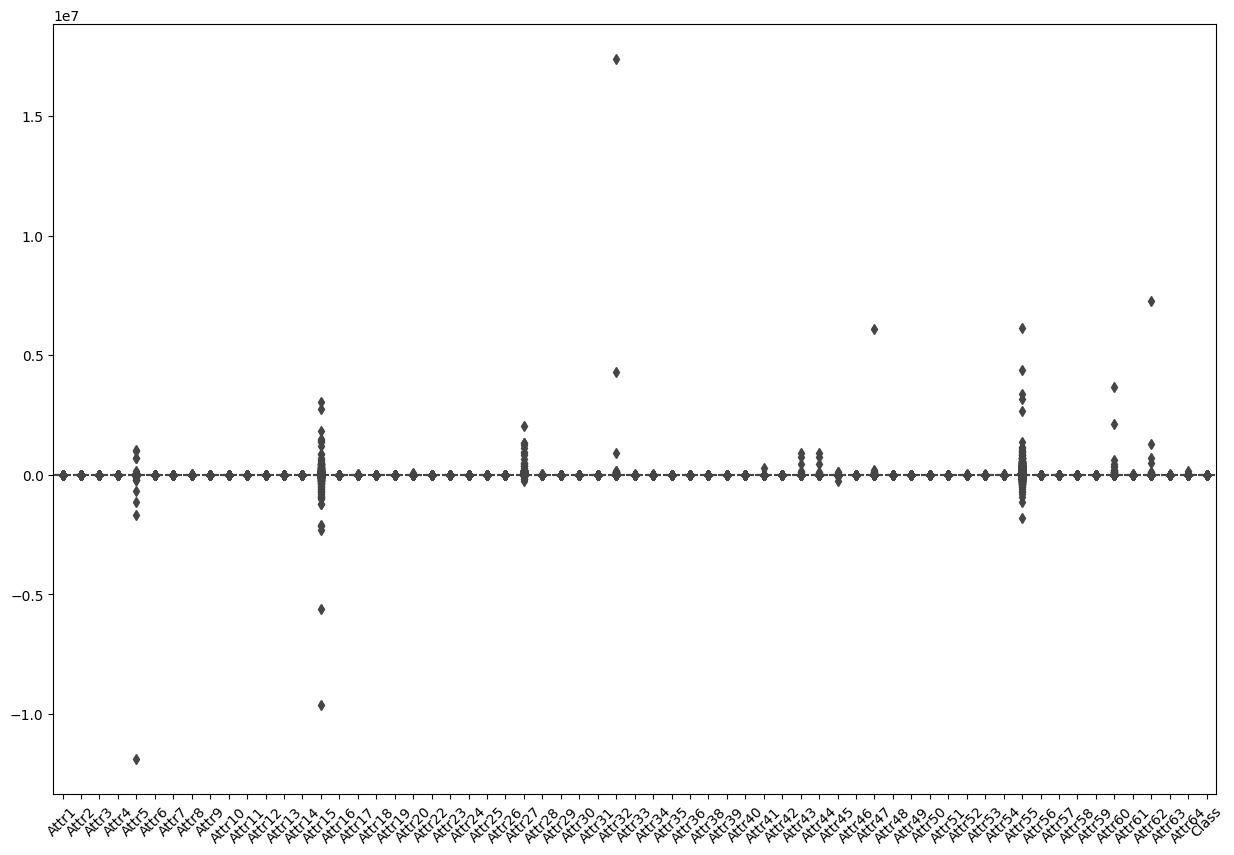

In [10]:
# Checking for outliers

plt.figure(figsize=(15, 10))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

In [11]:
def outlier_boundaries(df, col, threshold=1.5):
    """
    This function detects the upper and lower boundaries of non-outlier data using the IQR method
    Args: the dataframe, the column, and the threshold (with a default value of 1.5) 
    Returns: the lower boundary, and the upper boundary
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_boundary = q1 - (threshold * iqr)
    upper_boundary = q3 + (threshold * iqr)

    return lower_boundary, upper_boundary

In [12]:
for col in df.columns:
    lower_boundary, upper_boundary = outlier_boundaries(df, col)
    outliers_df = df[(df[col] < lower_boundary) | (df[col] > upper_boundary)]
    
    print(f'{round(len(outliers_df) / len(df), 2)} of {col} are outliers.')
    print('-' * 20)

0.1 of Attr1 are outliers.
--------------------
0.02 of Attr2 are outliers.
--------------------
0.02 of Attr3 are outliers.
--------------------
0.1 of Attr4 are outliers.
--------------------
0.14 of Attr5 are outliers.
--------------------
0.2 of Attr6 are outliers.
--------------------
0.09 of Attr7 are outliers.
--------------------
0.1 of Attr8 are outliers.
--------------------
0.07 of Attr9 are outliers.
--------------------
0.02 of Attr10 are outliers.
--------------------
0.08 of Attr11 are outliers.
--------------------
0.12 of Attr12 are outliers.
--------------------
0.09 of Attr13 are outliers.
--------------------
0.09 of Attr14 are outliers.
--------------------
0.16 of Attr15 are outliers.
--------------------
0.11 of Attr16 are outliers.
--------------------
0.1 of Attr17 are outliers.
--------------------
0.09 of Attr18 are outliers.
--------------------
0.11 of Attr19 are outliers.
--------------------
0.06 of Attr20 are outliers.
--------------------
0.07 of Attr22

The existance of outliers was expected due to the the nature of the data which represents a wide variety of companies from different industries and with different scales and financial status.

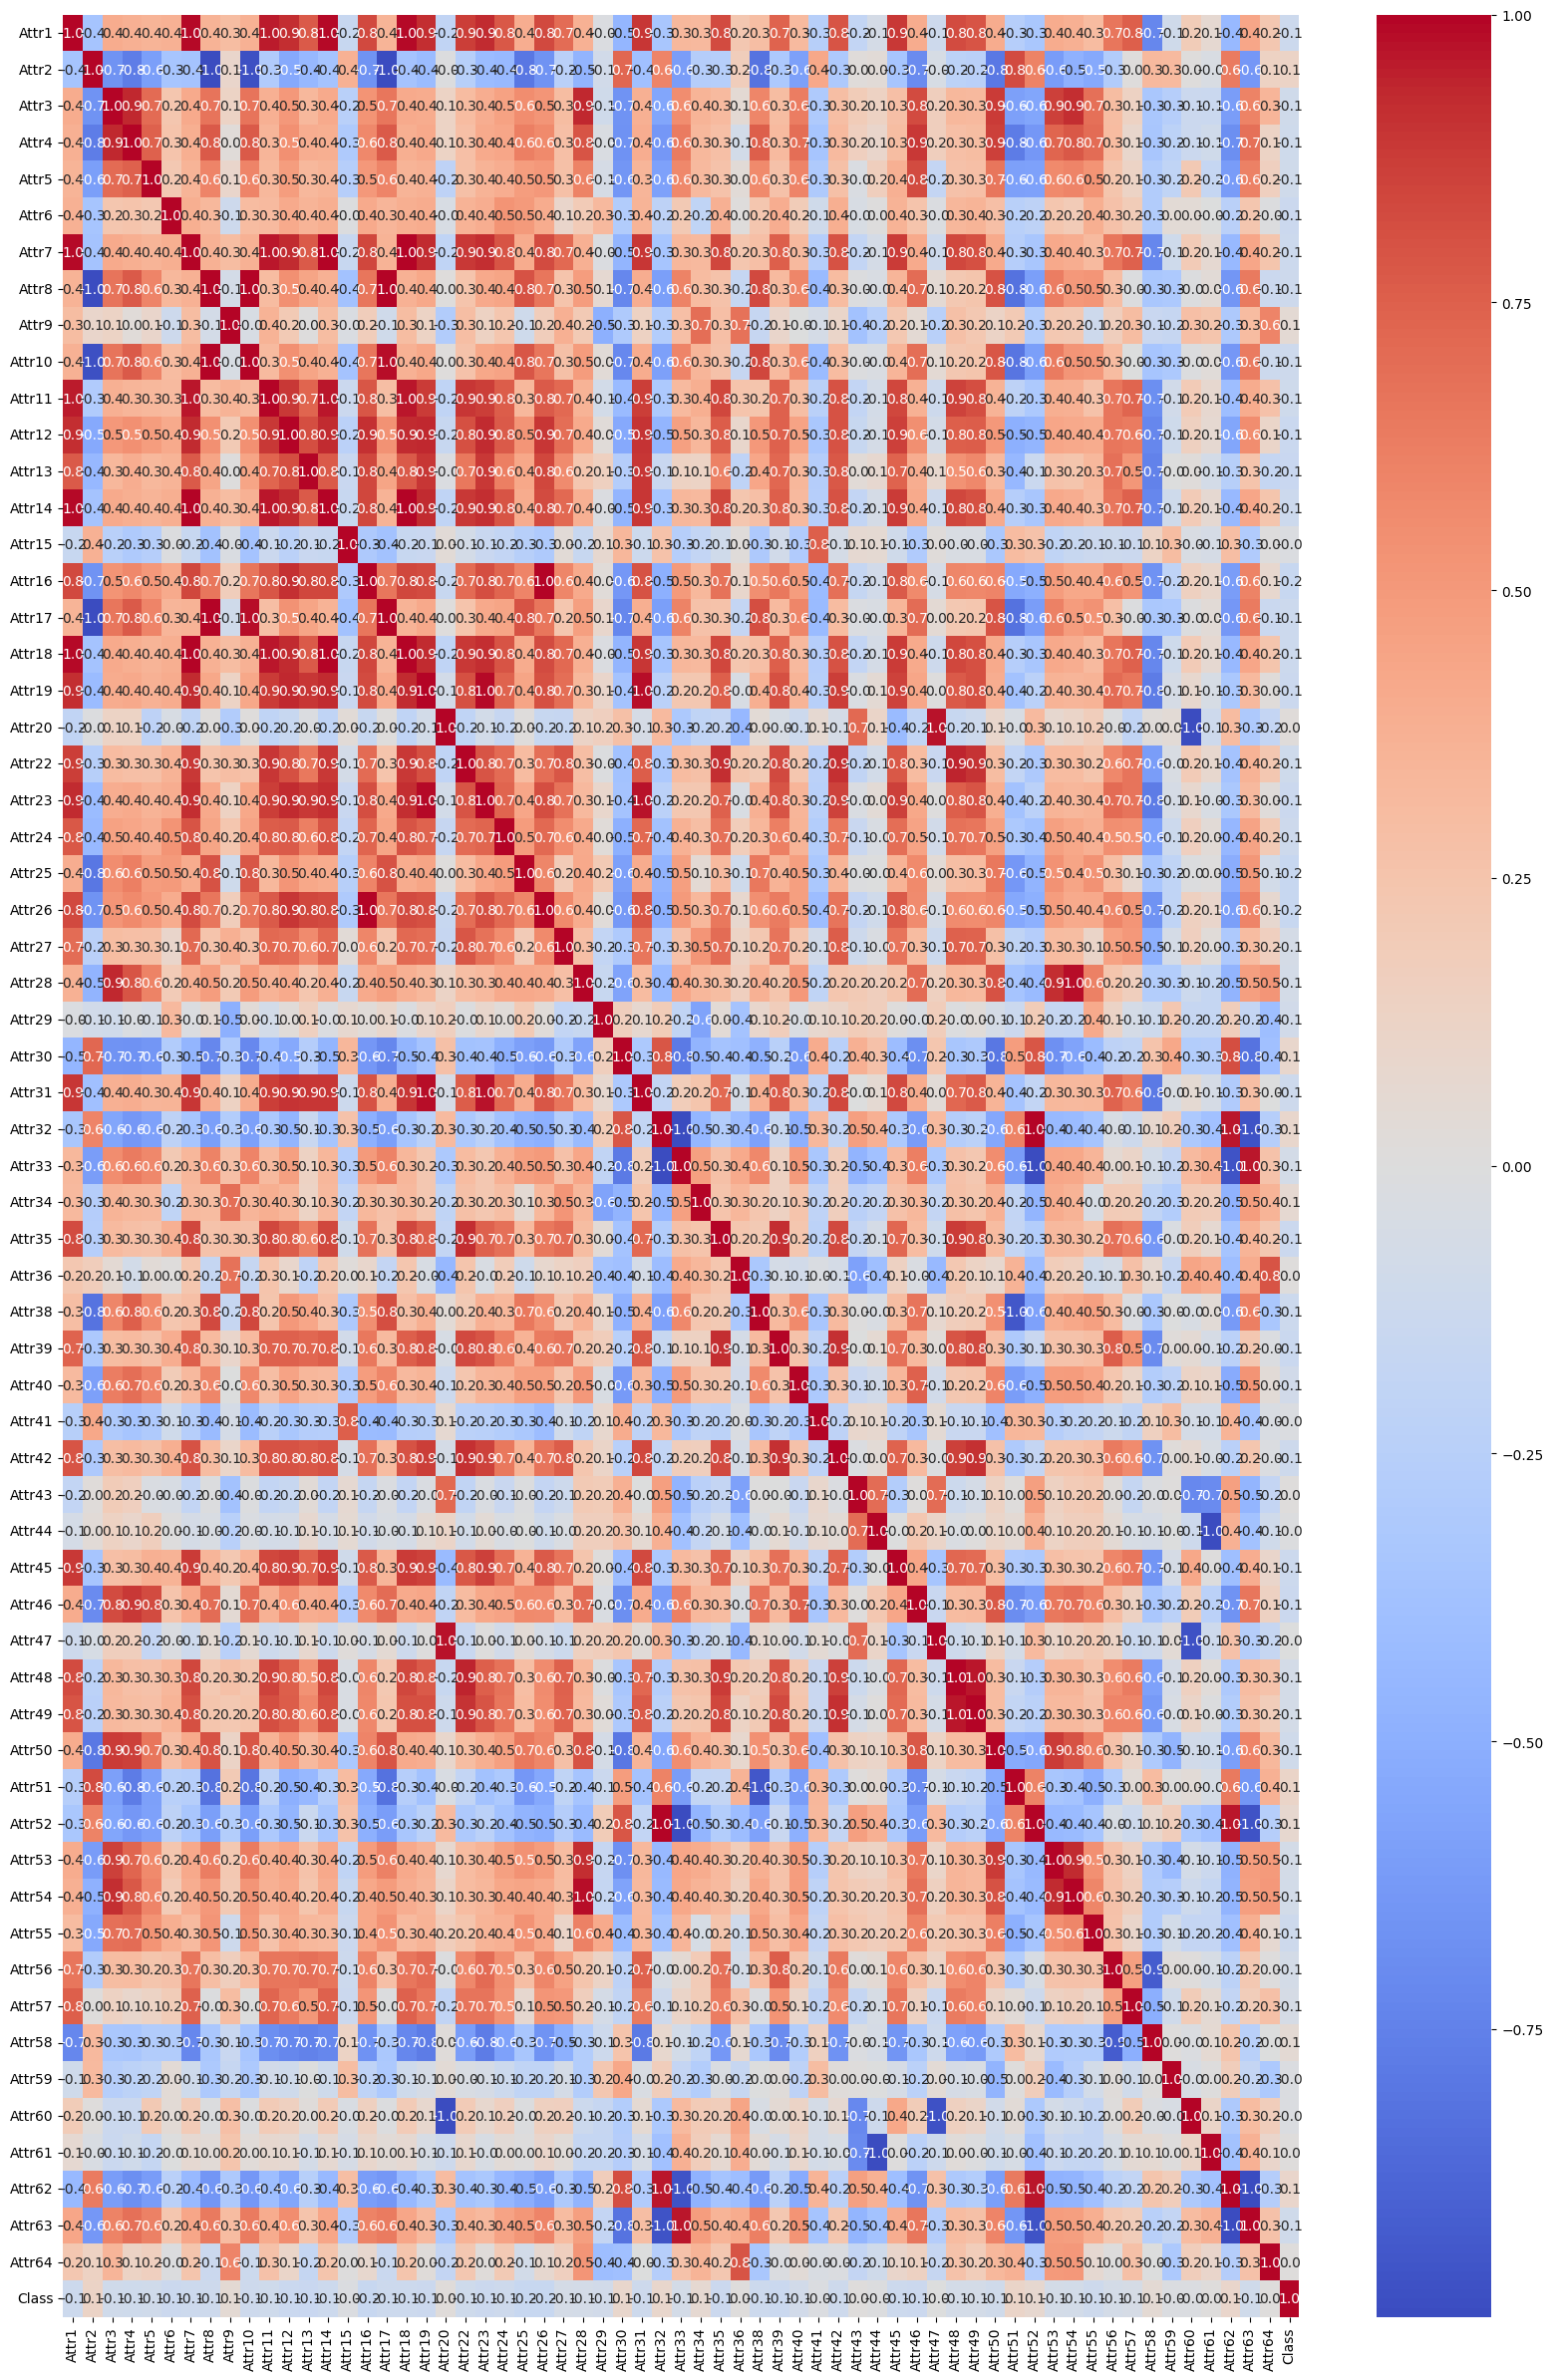

In [13]:
# Checking for multicollinearity

corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(20,30))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

The multicollinearity observed among multiple features likely stems from their interconnected nature, as many of these financial ratios share common financial components such as net profit, total assets, liabilities, and sales. <br>

**Note:** Spearman correlation coefficient was used to determine multicollinear variables because unlike Pearson's, Spearman correlation is robust to outliers, and it detects the association between variables be it linear or nonlinear.

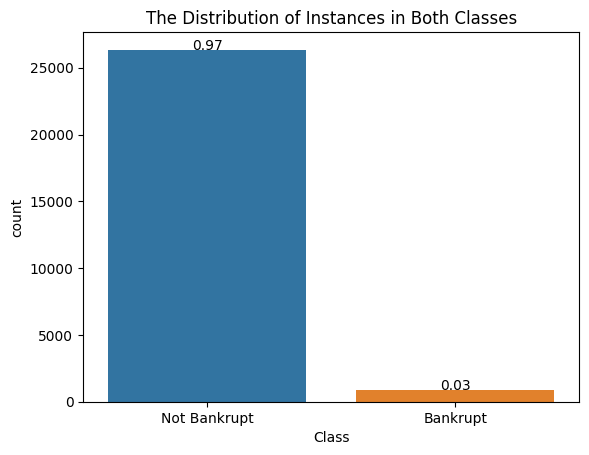

In [14]:
# Checking for class imbalance

ax = sns.countplot(x=df.Class)

for p in ax.patches:
    ax.annotate(round(p.get_height() / len(df), 2),  # % = Bar height (class count) / Total count
                ((p.get_x() + (p.get_width() / 2)), p.get_height()),  # The x & y coordinates of the label
                ha='center', va='baseline')  # The horizontal and vertical alignment of the label

ax.set_xticklabels(labels=['Not Bankrupt', 'Bankrupt'])
plt.title('The Distribution of Instances in Both Classes')
plt.show()

The severe class imbalance is obvious. <br>
The nature of bankruptcy makes the problem of class imbalance an inevitable challenge.

## Data Preprocessing

In [15]:
# Removing duplicates

df.drop_duplicates(inplace=True)

df.shape[0]

27027

In [16]:
X = df.drop('Class', axis=1)
y = df.Class

The outliers of each individual column must be carefully examined, depending on domain knowledge, to determine if they represent errors or true values from the natural variation in the data. But generally, due to the very large percentage of outliers and the class imbalance, we can't afford to drop outliers. Instead, **we will cap them with the IQR boundaries using a threshold of 3**, and we will examine with the filtered and the unfiltered versions of the data to see whether the existance of outliers have a negative effect on the models or not.

In [17]:
# Treating outliers

X_filt = X.copy()

for col in X_filt.columns:
    lower_boundary, upper_boundary = outlier_boundaries(X_filt, col, 3)
    X_filt.loc[X_filt[col] > upper_boundary, col] = upper_boundary
    X_filt.loc[X_filt[col] < lower_boundary, col] = lower_boundary

In [18]:
# Validating outlier treatment

for col in X_filt.columns:
    lower_boundary, upper_boundary = outlier_boundaries(X_filt, col, 3)
    outliers_df = X_filt[(X_filt[col] < lower_boundary) | (X_filt[col] > upper_boundary)]
    
    print(f'{round(len(outliers_df) / len(X_filt), 2)} of {col} are outliers.')
    print('-' * 20)

0.0 of Attr1 are outliers.
--------------------
0.0 of Attr2 are outliers.
--------------------
0.0 of Attr3 are outliers.
--------------------
0.0 of Attr4 are outliers.
--------------------
0.0 of Attr5 are outliers.
--------------------
0.0 of Attr6 are outliers.
--------------------
0.0 of Attr7 are outliers.
--------------------
0.0 of Attr8 are outliers.
--------------------
0.0 of Attr9 are outliers.
--------------------
0.0 of Attr10 are outliers.
--------------------
0.0 of Attr11 are outliers.
--------------------
0.0 of Attr12 are outliers.
--------------------
0.0 of Attr13 are outliers.
--------------------
0.0 of Attr14 are outliers.
--------------------
0.0 of Attr15 are outliers.
--------------------
0.0 of Attr16 are outliers.
--------------------
0.0 of Attr17 are outliers.
--------------------
0.0 of Attr18 are outliers.
--------------------
0.0 of Attr19 are outliers.
--------------------
0.0 of Attr20 are outliers.
--------------------
0.0 of Attr22 are outliers.
-

In [19]:
# Splitting the data into train and test datasets with stratify to keep the same proportions of the classes

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_train_filt, X_val_filt, y_train, y_val = train_test_split(X_filt, y, stratify=y, test_size=0.2, random_state=0)

As for class imbalance, we can handle it through oversampling, undersampling, or class weighting. <br>
- Oversampling will not cause data loss but will cause the loss of data variability and increase the risk of overfitting. <br>
- Undersampling mitigates overfitting but will cause information loss. <br>
- Class Weighting is simple and efficient but may not be sufficient because of the extreme imbalance. <br>

Therefore, **we will use a combination of all 3 methods.** <br>
We will oversample the minority class to respresent 45% of the majority class, then we will undersample the majority class till the minority class represents 90% of the majority class, and in each model we will set a higher weight for the minority class (double the weight of the majority class).

In [20]:
# Hndling class imbalance with a combination of oversampling and undersampling

over_samp = SMOTE(sampling_strategy=0.45, random_state=0)
X_smote, y_smote = over_samp.fit_resample(X_train, y_train)
X_smote_filt, y_smote_filt = over_samp.fit_resample(X_train_filt, y_train)

under_samp = RandomUnderSampler(sampling_strategy=0.9, random_state=0)
X_resamp, y_resamp = under_samp.fit_resample(X_smote, y_smote)
X_resamp_filt, y_resamp_filt = under_samp.fit_resample(X_smote_filt, y_smote_filt)

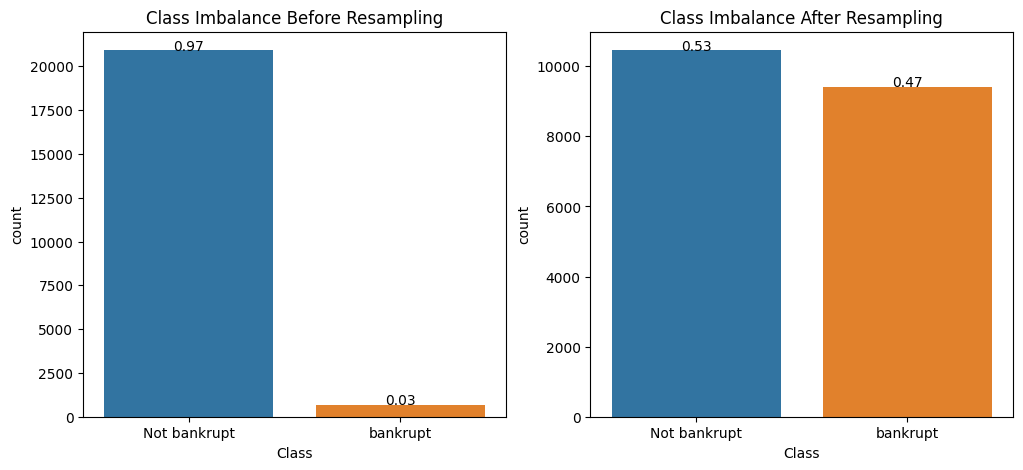

In [21]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=y_train)
for p in ax1.patches:
    ax1.annotate(round(p.get_height() / len(y_train), 2),
                ((p.get_x() + (p.get_width() / 2)), p.get_height()),
                ha='center', va='baseline')
ax1.set_xticklabels(labels=['Not bankrupt', 'bankrupt'])
plt.title('Class Imbalance Before Resampling')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_resamp)
for p in ax2.patches:
    ax2.annotate(round(p.get_height() / len(y_resamp), 2),
                ((p.get_x() + (p.get_width() / 2)), p.get_height()),
                ha='center', va='baseline')
ax2.set_xticklabels(labels=['Not bankrupt', 'bankrupt'])
plt.title('Class Imbalance After Resampling')

plt.show()

## Initial Testing

Handling outliers and class imbalance resulted in 2 sets of training data: <br>
1. Resampled & Unfiltered <br>
2. Resampled & Filtered <br>

Based on related work, tree-based and ensemble models tend to perform well on such cases. We will test 4 models, namely **Decision Tree, Random Forest, XGBoosting, and LightGBM**, with their default parameters on the 2 sets of data to decide upon the most suitable set of training data and the champion model. <br>

As for evaluation metrics, the choice depends on the aim of the model, whether to minimize false positives (FP) or false negatives (FN). In the case of predicting bankruptcy, **the cost associated with FN is typically considered higher than the cost of FP** because FN means that the model fails to identify a company that will actually go bankrupt, whcih means missing the opportunity to take corrective actions resulting in severe financial losses or even business failure. The key metric to prioritize in this case is **Recall**, also known as **True Positive Rate (TPR)**, as it measures the proportion of actual positive cases that were correctly predicted by the model as positive. Nevertheless, we can't focus all of our efforts on reducing FN and neglect FP, that's why we need to keep an eye on **the Area Under the Precision-Recall Curve (AUC-PR)** as it directly emphasizes the model's ability to capture positive cases while maintaining high precision.

In [22]:
def aucpr(model, X_test, y_test):
    """
    This function calculates the area under the precision-recall curve
    Args: the model, training features, and true labels
    Returns: auc-pr
    """
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
    auc_pr = metrics.auc(recall, precision)
    return auc_pr

In [23]:
# Decision Tree

dt_model1 = DecisionTreeClassifier(random_state=0, class_weight={0:1, 1:2})
dt_model1.fit(X_resamp, y_resamp)
dt_y_pred1 = dt_model1.predict(X_val)
print('Decision Tree - Unfiltered')
print('Recall:', metrics.recall_score(y_val, dt_y_pred1))
print('AUC-PR:', aucpr(dt_model1, X_val, y_val))
print('-' * 20)

dt_model2 = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dt_model2.fit(X_resamp_filt, y_resamp_filt)
dt_y_pred2 = dt_model2.predict(X_val_filt)
print('Decision Tree - Filtered')
print('Recall:', metrics.recall_score(y_val, dt_y_pred2))
print('AUC-PR:', aucpr(dt_model2, X_val_filt, y_val))

Decision Tree - Unfiltered
Recall: 0.5517241379310345
AUC-PR: 0.36307627540280907
--------------------
Decision Tree - Filtered
Recall: 0.4942528735632184
AUC-PR: 0.3312372729288556


In [24]:
# Random Forest

rf_model1 = RandomForestClassifier(random_state=0, class_weight={0:1, 1:2})
rf_model1.fit(X_resamp, y_resamp)
rf_y_pred1 = rf_model1.predict(X_val)
print('Random Forest - Unfiltered')
print('Recall:', metrics.recall_score(y_val, rf_y_pred1))
print('AUC-PR:', aucpr(rf_model1, X_val, y_val))
print('-' * 20)

rf_model2 = RandomForestClassifier(random_state=0, class_weight='balanced')
rf_model2.fit(X_resamp_filt, y_resamp_filt)
rf_y_pred2 = rf_model2.predict(X_val_filt)
print('Random Forest - Filtered')
print('Recall:', metrics.recall_score(y_val, rf_y_pred2))
print('AUC-PR:', aucpr(rf_model2, X_val_filt, y_val))

Random Forest - Unfiltered
Recall: 0.47126436781609193
AUC-PR: 0.272286533216745
--------------------
Random Forest - Filtered
Recall: 0.4425287356321839
AUC-PR: 0.2864950861677194


In [25]:
# XGBoost

xgb_model1 = XGBClassifier(random_state=0, scale_pos_weight=2)
xgb_model1.fit(X_resamp, y_resamp)
xgb_y_pred1 = xgb_model1.predict(X_val)
print('XGBoost - Unfiltered')
print('Recall:', metrics.recall_score(y_val, xgb_y_pred1))
print('AUC-PR:', aucpr(xgb_model1, X_val, y_val))
print('-' * 20)

xgb_model2 = XGBClassifier(random_state=0, scale_pos_weight=2)
xgb_model2.fit(X_resamp_filt, y_resamp_filt)
xgb_y_pred2 = xgb_model2.predict(X_val_filt)
print('XGBoost - Filtered')
print('Recall:', metrics.recall_score(y_val, xgb_y_pred2))
print('AUC-PR:', aucpr(xgb_model2, X_val_filt, y_val))

XGBoost - Unfiltered
Recall: 0.6839080459770115
AUC-PR: 0.6359729335440271
--------------------
XGBoost - Filtered
Recall: 0.6839080459770115
AUC-PR: 0.6340174821036567


In [26]:
# LightGBM

lgb_model1 = LGBMClassifier(random_state=0, verbose=-1, scale_pos_weight=2)
lgb_model1.fit(X_resamp, y_resamp)
lgb_y_pred1 = lgb_model1.predict(X_val)
print('LGBM - Unfiltered')
print('Recall:', metrics.recall_score(y_val, lgb_y_pred1))
print('AUC-PR:', aucpr(lgb_model1, X_val, y_val))
print('-' * 20)

lgb_model2 = LGBMClassifier(random_state=0, verbose=-1, scale_pos_weight=2)
lgb_model2.fit(X_resamp_filt, y_resamp_filt)
lgb_y_pred2 = lgb_model2.predict(X_val_filt)
print('LGBM - Filtered')
print('Recall:', metrics.recall_score(y_val, lgb_y_pred2))
print('AUC-PR:', aucpr(lgb_model2, X_val_filt, y_val))

LGBM - Unfiltered
Recall: 0.8103448275862069
AUC-PR: 0.624408056622718
--------------------
LGBM - Filtered
Recall: 0.7011494252873564
AUC-PR: 0.5763560555658543


* Decision trees performed the best when trained on unfiltered data, with the highest scores being 0.55 for Recall and 0.36 for AUC-PR.
* Random forests trained on the unfiltered, with a Recall score of 0.47 and an AUC-PR score of 0.27.
* XGBoost performed the same on filtered and unfiltered data, with a score of 0.68 for Recall and 0.63 for AUC-PR.
* LGBM performed the highest with unfiltered data, with a Recall score of 0.81 and an AUC-PR score of 0.62.
<br>

Considering these scores, **the champion model for the initial testing is LGBM using unfiltered data.**

## Feature Selection

Various methods can be used to perform feature selection, we chose to test Principal Component Analysis, Permutation Feature Importance, Recursive Feature Elimination with Cross Validation, and Feature Importances with Random Forest. <br>
- PCA aids in reducing dimensionality and mitigating multicollinearity. <br>
- Permutation quantifies feature relevance regardless of the modeling approach. <br>
- RFECV effectively reduces the dimensionality of complex datasets while preserving the most informative features. <br>
- Feature Importances with Random Forest, being an ensemble model, excels in handling intricate data relationships and can uncover non-linear patterns and interactions among features.

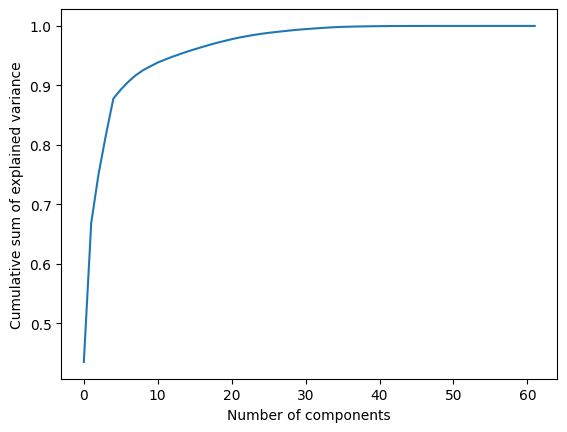

Number of features responsible for 99% of the variance in data: 28


In [27]:
# Principal Component Analysis

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_resamp)
X_val_sc = scaler.transform(X_val)

pca = PCA()
pca.fit(X_train_sc)
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of components')
plt.ylabel('Cumulative sum of explained variance')
plt.show()

pca99 = PCA(0.99)
pca99.fit(X_train_sc)
print(f'Number of features responsible for 99% of the variance in data: {pca99.n_components_}')

In [28]:
pca = PCA(28)
X_train_pca = pca.fit_transform(X_train_sc)
X_val_pca = pca.transform(X_val_sc)

In [29]:
# Permutation Feature Importance

lgb_model_fs = LGBMClassifier(random_state=0, verbose=-1, scale_pos_weight=2)
lgb_model_fs.fit(X_resamp, y_resamp)

results = permutation_importance(lgb_model_fs, X_val, y_val, scoring='recall', random_state=0)
sorted_indices = np.argsort(results.importances_mean)[::-1]

for idx in sorted_indices:
    feature_name = X_train_filt.columns[idx]
    importance_score = results.importances_mean[idx]
    print(f'Feature: {feature_name}, Importance: {importance_score}')

Feature: Attr34, Importance: 0.24137931034482754
Feature: Attr39, Importance: 0.18850574712643672
Feature: Attr46, Importance: 0.164367816091954
Feature: Attr26, Importance: 0.07241379310344823
Feature: Attr25, Importance: 0.07241379310344823
Feature: Attr5, Importance: 0.0701149425287356
Feature: Attr38, Importance: 0.05747126436781604
Feature: Attr6, Importance: 0.04597701149425282
Feature: Attr61, Importance: 0.04022988505747125
Feature: Attr55, Importance: 0.033333333333333284
Feature: Attr30, Importance: 0.03218390804597695
Feature: Attr60, Importance: 0.024137931034482696
Feature: Attr32, Importance: 0.022988505747126388
Feature: Attr22, Importance: 0.021839080459770076
Feature: Attr58, Importance: 0.017241379310344796
Feature: Attr3, Importance: 0.016091954022988464
Feature: Attr27, Importance: 0.014942528735632154
Feature: Attr42, Importance: 0.013793103448275845
Feature: Attr20, Importance: 0.013793103448275801
Feature: Attr29, Importance: 0.012643678160919491
Feature: Attr64,

In [30]:
top_features = [X_resamp.columns[idx] for idx in sorted_indices[:45]]  # Features with importance > 0

X_train_perm = X_resamp[top_features]
X_val_perm = X_val[top_features]

In [31]:
# Recursive Feature Elimination with Cross Validation

rfecv = RFECV(estimator=lgb_model_fs, cv=3, scoring='recall')
rfecv.fit(X_resamp, y_resamp)

print(f'Optimal number of features selected: {rfecv.n_features_}')

Optimal number of features selected: 38


In [32]:
X_train_rfe = X_resamp.iloc[:, rfecv.support_]
X_val_rfe = X_val.iloc[:, rfecv.support_]

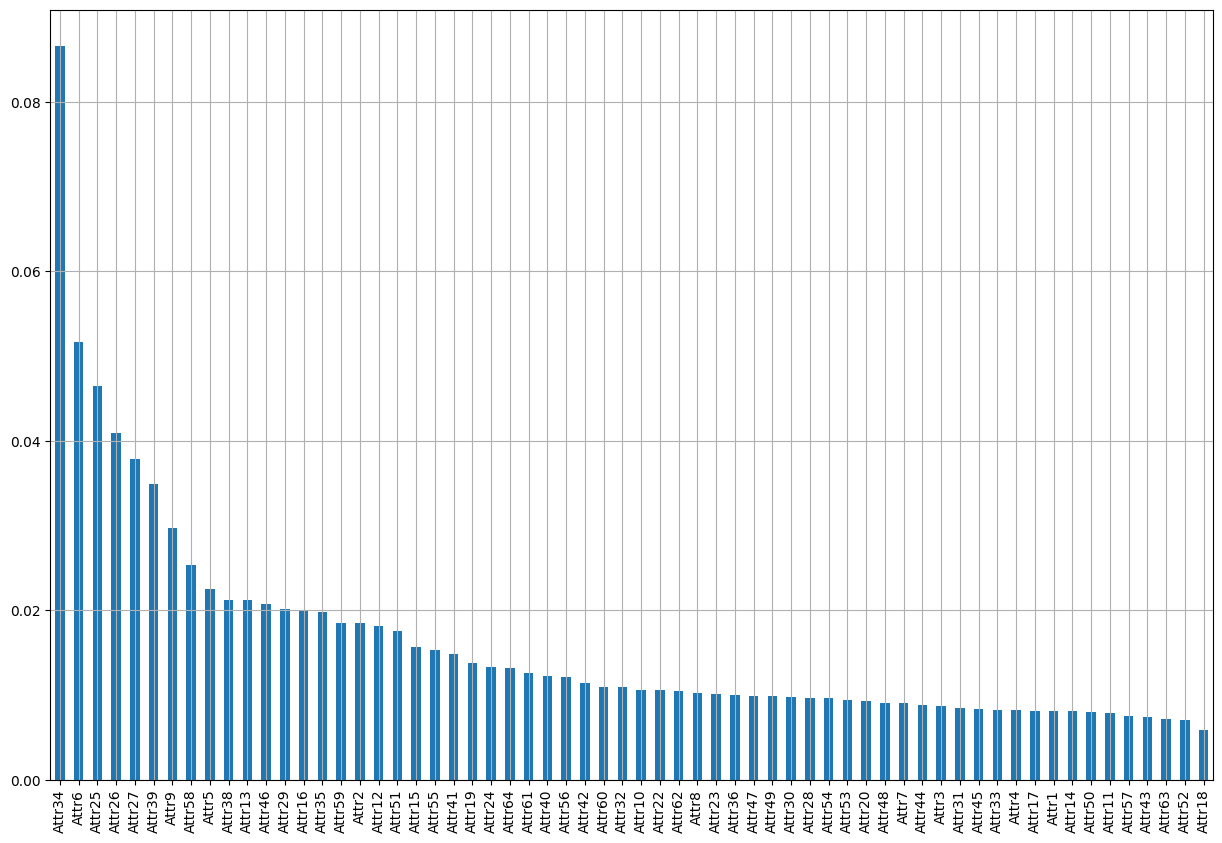

In [33]:
# Feature Importances with Random Forest

rf_model_fs = RandomForestClassifier(random_state=0)
rf_model_fs.fit(X_resamp, y_resamp)
importance = pd.Series(rf_model_fs.feature_importances_, index=X_resamp.columns)
importance = importance.sort_values(ascending=False)

plt.figure(figsize=(15,10))
importance.plot(kind='bar')
plt.grid()
plt.show()

In [34]:
def select_top_imp_features(X, y, model, top_features):
    """
    This function performs cross-validation on a chosen set of top features from the
    features ranked by Feature Importances with Random Forest to select the best top n
    Args: X, y, model, top features
    Returns: average cross validation score
    """
    cv = StratifiedKFold(shuffle=True, random_state=0)
    
    X_top = X[top_features]

    scores = []
    for train_index, test_index in cv.split(X_top, y):
        X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = metrics.recall_score(y_test, y_pred)
        scores.append(score)

    average_score = np.mean(scores)

    return average_score

In [35]:
best_num_features = 0
best_score = 0

for top_n in range(1, 63):  # Adding one feature at a time and comparing cv scores
    top_features = importance.index[:top_n].tolist()
    score = select_top_imp_features(X, y, lgb_model_fs, top_features)
    if score > best_score:
        best_score = score
        best_num_features = top_n

print(f'Best number of top features: {best_num_features}')
print(f'Best cross-validation score: {best_score}')

Best number of top features: 51
Best cross-validation score: 0.409640555444821


In [36]:
top_features = importance.index[:51].tolist()

X_train_imp = X_resamp[top_features]
X_val_imp = X_val[top_features]

In [37]:
# Testing feature selection methods

lgb_model1 = LGBMClassifier(random_state=0, verbose=-1, scale_pos_weight=2)
lgb_model1.fit(X_train_pca, y_resamp)
lgb_y_pred1 = lgb_model1.predict(X_val_pca)
print('Principal Component Analysis - Top 28')
print('Recall:', metrics.recall_score(y_val, lgb_y_pred1))
print('AUC-PR:', aucpr(lgb_model1, X_val_pca, y_val))
print('-' * 20)

lgb_model2 = LGBMClassifier(random_state=0, verbose=-1, scale_pos_weight=2)
lgb_model2.fit(X_train_perm, y_resamp)
lgb_y_pred2 = lgb_model2.predict(X_val_perm)
print('Permutation Feature Importance - Top 45')
print('Recall:', metrics.recall_score(y_val, lgb_y_pred2))
print('AUC-PR:', aucpr(lgb_model2, X_val_perm, y_val))
print('-' * 20)

lgb_model3 = LGBMClassifier(random_state=0, verbose=-1, scale_pos_weight=2)
lgb_model3.fit(X_train_rfe, y_resamp)
lgb_y_pred3 = lgb_model3.predict(X_val_rfe)
print('Recursive Feature Elimination - Top 38')
print('Recall:', metrics.recall_score(y_val, lgb_y_pred3))
print('AUC-PR:', aucpr(lgb_model3, X_val_rfe, y_val))
print('-' * 20)

lgb_model4 = LGBMClassifier(random_state=0, verbose=-1, scale_pos_weight=2)
lgb_model4.fit(X_train_imp, y_resamp)
lgb_y_pred4 = lgb_model4.predict(X_val_imp)
print('Feature Importances with Random Forest - Top 51')
print('Recall:', metrics.recall_score(y_val, lgb_y_pred4))
print('AUC-PR:', aucpr(lgb_model4, X_val_imp, y_val))
print('-' * 20)

Principal Component Analysis - Top 28
Recall: 0.7183908045977011
AUC-PR: 0.17532722339789517
--------------------
Permutation Feature Importance - Top 45
Recall: 0.7816091954022989
AUC-PR: 0.6183944253295953
--------------------
Recursive Feature Elimination - Top 38
Recall: 0.7873563218390804
AUC-PR: 0.6187830209651181
--------------------
Feature Importances with Random Forest - Top 51
Recall: 0.7816091954022989
AUC-PR: 0.6235124146891152
--------------------


Feature Importances with Random Forest achieved the highest recall score of 0.78 and AUC-PR score of 0.62.

## Tuning the Model

We will apply Grid Search to tune the model hyperparameters using Stratified KFold Cross Validation.

In [ ]:
# Hyperparameter tuning

lgb_model = LGBMClassifier(random_state=0, scale_pos_weight=2, verbose=-1)
param_grid = {'n_estimators': [300, 400, 500, 600, 700, 800],
              'max_depth': [5, 7, 10, 15],
              'learning_rate': [0.01, 0.1, 0.3, 0.4]}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

search = GridSearchCV(lgb_model, param_grid, scoring='recall', cv=skf, n_jobs=-1)
search.fit(X_train_imp, y_resamp)

search.best_params_

## {'n_estimators': 800, 'max_depth': 5', learning_rate': 0.3}

In [41]:
lgb_model = LGBMClassifier(random_state=0,
                           verbose=-1,
                           scale_pos_weight=2,
                           max_depth=5,
                           n_estimators=800,
                           learning_rate=0.3)
lgb_model.fit(X_train_imp, y_resamp)

y_pred = lgb_model.predict(X_val_imp)
auc_pr = aucpr(lgb_model, X_val_imp, y_val)
recall = metrics.recall_score(y_val, y_pred)

print(metrics.classification_report(y_val, y_pred))
print(f'AUC-PR: {round(auc_pr, 2)}')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5232
           1       0.66      0.70      0.68       174

    accuracy                           0.98      5406
   macro avg       0.83      0.84      0.84      5406
weighted avg       0.98      0.98      0.98      5406

AUC-PR: 0.7


* Out of all the companies that the model predicted would go bankrupt, **66%** actually did.
* Out of all the companies that actually did go bankrupt, the model predicted this outcome correctly for only **70%** of those companies.
* The AUC-PR score of **0.7** suggests that the model's ability to identify companies at risk of bankruptcy, considering precision and recall, is reasonably good but not perfect.
* The Macro F1 Score of **0.84** indicates that the model performs well in achieving a balance between precision and recall for predicting bankruptcy across multiple companies.